Using TensorFlow backend.


 9453568/11490434 [=======================>......] - ETA: 0s(50000, 28, 28) (50000,)


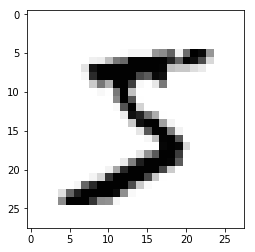

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf
import time

# Flatten the graphs
Converting each 28x28 pixel graph into a single array with 784 elements  
Converting the label array to one-hot

In [3]:
def convert_to_base(y):
    y_base = np.zeros((y.shape[0],10))
    for i in range(y.shape[0]):
        y_base[i,y[i]] = 1.0
    return y_base

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

y_train_base = convert_to_base(y_train)
y_val_base = convert_to_base(y_val)
y_test_base = convert_to_base(y_test)

# Setting up neural network
Input layer: 784 neurons  
1 hidden layer: 100 neurons  
Output layer: 10 neurons

In [5]:
mini_batch = 10
num_iterations = 40000
num_diagnostic = 200
num_neurons = [784, 100, 10]
num_total_layers = len(num_neurons)

X_subset = tf.placeholder(dtype = 'float32', name = 'X_subset', shape=[None, 784])
y_subset = tf.placeholder(dtype = 'float32', name = 'y_subset', shape=[None, 10])
X_eval = tf.placeholder(dtype = 'float32', name = 'X_eval', shape=[None, 784])
y_eval = tf.placeholder(dtype = 'float32', name = 'y_eval', shape=[None, 10])

weights = []
biases = []
for i in range(num_total_layers-1):
    weights.append(tf.Variable(tf.truncated_normal([num_neurons[i], num_neurons[i+1]], stddev = 0.1), trainable=True))
    biases.append(tf.Variable(tf.truncated_normal([num_neurons[i+1]], stddev = 0.1), trainable=True))


# Training the network  
NN_output: Given input x of the training set, return the network output  
NN_loss: calculate the cross entropy loss between output and true label  
Get_accuracy: Calculate the accuracy on the test set

In [6]:
def NN_output(x):
    layer_out = x
    for i in range(num_total_layers-1):
        layer_out = tf.add(tf.matmul(layer_out, weights[i]), biases[i])
        layer_out = tf.nn.sigmoid(layer_out)
    
    return layer_out

In [7]:
def NN_loss(x, y):
    y_output = NN_output(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_output, labels=y))
    return loss

In [8]:
def Get_accuracy(x,y):
    corr_pred = tf.equal(tf.argmax(NN_output(x),1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
    return accuracy

In [9]:
# set up the tensorflow variable for training and evaluation
loss_NN = NN_loss(X_subset,y_subset)
train_NN = tf.train.GradientDescentOptimizer(0.5).minimize(loss_NN)
eval_NN = Get_accuracy(X_eval, y_eval)

In [10]:
# Run the training step and evaluate every num_diagnostic steps

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

start = time.time()

train_loss = []
test_loss = []
accuracy= []
iter_num = []

for i in range(num_iterations):
    
    ind = np.random.choice(X_train.shape[0], mini_batch)
    sess.run((train_NN, loss_NN), feed_dict = {X_subset: X_train[ind,:], y_subset: y_train_base[ind,:]})
    
    if(i % num_diagnostic == 0):
        iter_num.append(i)
        train_loss.append(sess.run(loss_NN, feed_dict = {X_subset: X_train, y_subset: y_train_base}))
        test_loss.append(sess.run(loss_NN, feed_dict = {X_subset: X_test, y_subset: y_test_base}))
        accuracy.append(sess.run(eval_NN, feed_dict = {X_eval: X_test, y_eval: y_test_base}))
        print('iteration step ', i, ', the accuracy is ', accuracy[-1], \
              'train loss is', train_loss[-1],', test loss is ', test_loss[-1])
        
end = time.time()

# print the time needed for training and evaluation
print('Total time is', end - start, 'seconds')


iteration step  0 , the accuracy is  0.0891 train loss is 2.30874 , test loss is  2.30951
iteration step  200 , the accuracy is  0.7099 train loss is 1.87719 , test loss is  1.86947
iteration step  400 , the accuracy is  0.7938 train loss is 1.74906 , test loss is  1.7416
iteration step  600 , the accuracy is  0.8425 train loss is 1.69824 , test loss is  1.69051
iteration step  800 , the accuracy is  0.8619 train loss is 1.66642 , test loss is  1.65847
iteration step  1000 , the accuracy is  0.8735 train loss is 1.64483 , test loss is  1.63747
iteration step  1200 , the accuracy is  0.8856 train loss is 1.62951 , test loss is  1.62164
iteration step  1400 , the accuracy is  0.8905 train loss is 1.61919 , test loss is  1.61162
iteration step  1600 , the accuracy is  0.8932 train loss is 1.60949 , test loss is  1.60185
iteration step  1800 , the accuracy is  0.8939 train loss is 1.60281 , test loss is  1.59612
iteration step  2000 , the accuracy is  0.8991 train loss is 1.59551 , test lo

iteration step  17800 , the accuracy is  0.9445 train loss is 1.51549 , test loss is  1.51699
iteration step  18000 , the accuracy is  0.9427 train loss is 1.51628 , test loss is  1.51786
iteration step  18200 , the accuracy is  0.9456 train loss is 1.51477 , test loss is  1.51598
iteration step  18400 , the accuracy is  0.9451 train loss is 1.51557 , test loss is  1.51684
iteration step  18600 , the accuracy is  0.945 train loss is 1.51473 , test loss is  1.5162
iteration step  18800 , the accuracy is  0.9454 train loss is 1.51328 , test loss is  1.5151
iteration step  19000 , the accuracy is  0.9459 train loss is 1.51359 , test loss is  1.51548
iteration step  19200 , the accuracy is  0.9469 train loss is 1.51278 , test loss is  1.51491
iteration step  19400 , the accuracy is  0.947 train loss is 1.51307 , test loss is  1.51494
iteration step  19600 , the accuracy is  0.9469 train loss is 1.5128 , test loss is  1.51454
iteration step  19800 , the accuracy is  0.9461 train loss is 1.5

iteration step  35400 , the accuracy is  0.9585 train loss is 1.49915 , test loss is  1.50355
iteration step  35600 , the accuracy is  0.9575 train loss is 1.49867 , test loss is  1.50361
iteration step  35800 , the accuracy is  0.9577 train loss is 1.50028 , test loss is  1.50527
iteration step  36000 , the accuracy is  0.9578 train loss is 1.49887 , test loss is  1.50408
iteration step  36200 , the accuracy is  0.9577 train loss is 1.49861 , test loss is  1.50358
iteration step  36400 , the accuracy is  0.958 train loss is 1.49896 , test loss is  1.50397
iteration step  36600 , the accuracy is  0.9582 train loss is 1.49805 , test loss is  1.50323
iteration step  36800 , the accuracy is  0.9573 train loss is 1.49848 , test loss is  1.50392
iteration step  37000 , the accuracy is  0.9562 train loss is 1.49853 , test loss is  1.50407
iteration step  37200 , the accuracy is  0.9586 train loss is 1.49813 , test loss is  1.50304
iteration step  37400 , the accuracy is  0.9586 train loss is

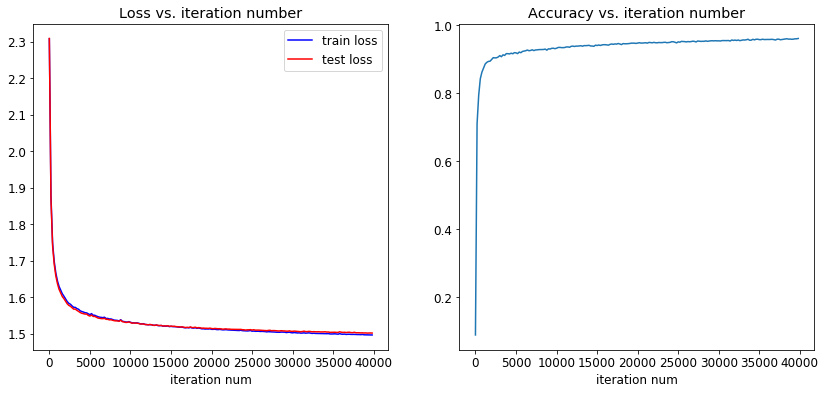

In [11]:
#Plot the loss and accuracy vs. iteration number

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.rc('font', size= 12)
plt.subplot(121)
plt.plot(iter_num, train_loss, 'b')
plt.plot(iter_num, test_loss, 'r')
plt.legend(['train loss', 'test loss'])
plt.xlabel('iteration num')
plt.title('Loss vs. iteration number')
plt.subplot(122)
plt.plot(iter_num, accuracy)
plt.xlabel('iteration num')
plt.title('Accuracy vs. iteration number')
plt.show()